# **Python Variable scopes**

# **Topics**
1. **Introduction to Python variable scopes**
2. **Global scopes**
3. **Local scopes**
4. **Variable lookups**
5. **Python nonlocal**

## **Introduction to Python variable scopes**
* When you assign an object to a variable, the variable will reference that object in the memory. And it’s saying that the variable is bound to the object.

* After the assignment, you can access the object using the variable name in various parts of your code. However, you cannot access the variable everywhere in the code.

* The variable name and its binding (name and object) only exist in specific parts of your code.

* The part of the code where you define the name/binding is called the lexical scope of the variables.

* Python stores these bindings in something called namespaces. Every scope has its own namespace.

* And you can think that a namespace is a table which contains the label and the reference that the label is bound to.

## **Global scopes**
* The global scope is basically the module scope. The global scope spans a single Python source code file only.

* Python doesn’t have a truly global scope that spans across all modules except for the built-in scope.

* The built-in scope is a special scope that provides globally available objects such as print, len, None, True, and False.

* Basically, the built-in and global variables exist everywhere inside a module.

* Internally, global scopes are nested inside the built-in scope:
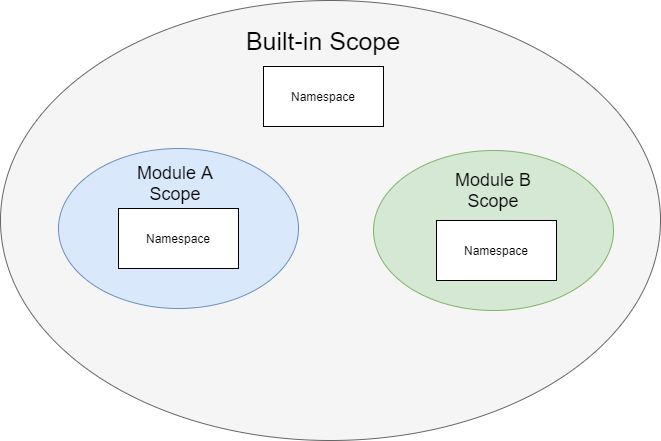

* If you access a variable from a scope and Python doesn’t find it in the namespace of that scope, it’ll search in the enclosing scope’s namespace.

* Suppose that you have the following statement in a module called app.py:

In [1]:
print('Hello')

Hello


* In this app.py module, Python looks for the print function in the module scope (app.py).

* Since Python doesn’t find the definition of the print function in the app.py module scope, Python goes up to the enclosing scope, which is the built-in scope, and looks for the print function there. In this case, it can find the print function in the built-in scope.
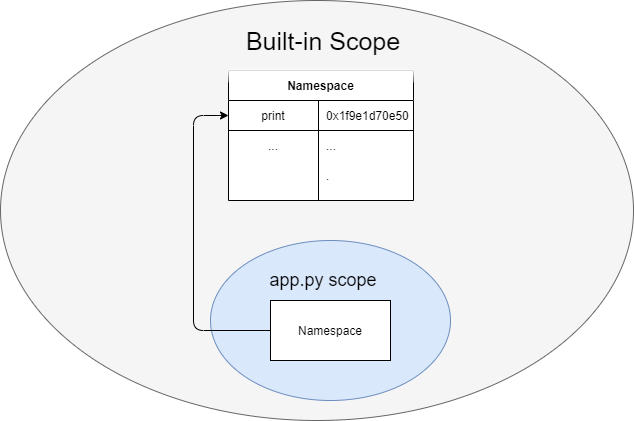
* If you change the statement to the following, you’ll get an runtime error:
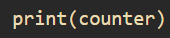

* In this example, Python doesn’t find the counter in the current global scope. Therefore, Python looks for it in the enclosing scope, which is the built-in scope.

* However, the variable counter doesn’t exist in the built-in scope. Therefore, Python issues a NameError exception:
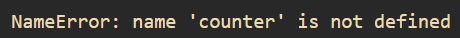

## **Local scopes**
* When creating a function, you can define parameters and variables for the function. For example:


In [2]:
def increment(counter, by=1):
    result = counter + by
    return result

* When you execute the code, Python carries two phases: compilation and execution.

* When Python compiles the file, it adds the increment function to the global scope. In addition, Python determines that the counter, by, and result variables inside the increment() function will be local to the increment() function. And Python won’t create the counter, by and result variables until the function is executed.

* Every time you call a function, Python creates a new scope. Python also assigns the variables defined inside the function to that scope. And this scope is called a function local scope or local scope.

* In our example, when you call the increment() function:

In [3]:
increment(10,2)

12

* … Python creates a local scope for the increment() function call.

* Also, Python creates local variables counter, by, and result in the local namespace and binds them to values 10, 2, and 12.

* When the function completes, Python will delete the local scope. And all the local variables such as counter, by, and result variables are out of scope. If you attempt to access these variables from outside the increment() function, you’ll get an error.

* And if you call the increment() function again:

In [4]:
increment(100,3)

103

* … Python creates a new local scope and variables including counter, by and result, and binds them to values 100, 3, and 103.
## **Variable lookups**
* In Python, scopes are nested. For example, local scopes are nested inside a module scope. And module scopes are nested inside the built-scope:
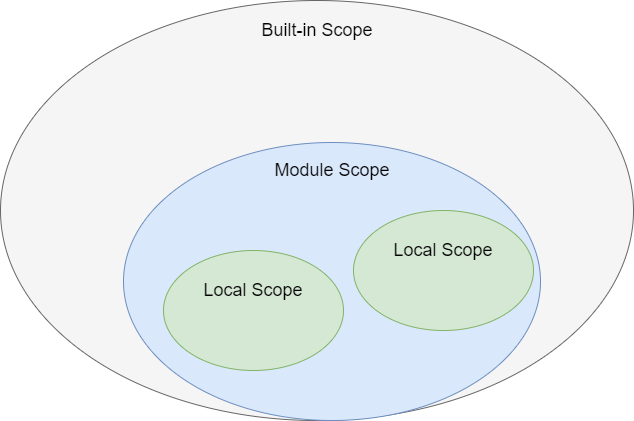
* When you access an object bound to a variable, Python tries to find the object:

    * in the current local scope first.
    * and goes up the chain of enclosing scopes if Python doesn’t find the object in the current scope.
## **The global keyword**
* When you retrieve the value of a global variable from inside a function, Python automatically searches the local scope’s namespace and up the chain of all enclosing scope namespaces. 
* For example:


In [5]:
counter = 10


def current():
    print(counter)


current()

10


* In this example, when the current() function is running, Python looks for the counter variable in the local scope.

* Since Python doesn’t find it, it searches for the variable in the global scope. And Python can find the counter variable in the global scope in this case.

* However, if you assign a value to a global variable from inside a function, Python will place that variable into the local namespace instead. For example:


In [6]:
counter = 10


def reset():
    counter = 0
    print(counter)


reset()
print(counter)


0
10


* At the compile time, Python interprets the counter as a local variable.

* When reset() function is running, Python finds the counter in the local scope. The print(counter) statement inside the reset() function shows the value of the counter, which is zero.

* When we print counter after the reset() function completes, it shows 10 instead.

* In this example, the local counter variable masks the global counter variable.

* If you want to access a global variable from inside a function, you can use the global keyword. For example:

In [7]:
counter = 10


def reset():
    global counter
    counter = 0
    print(counter) # 0


reset()

print(counter) # 0


0
0


In [8]:
#In this example, the following statement:
global counter

* …instructs Python that the counter variable is bound to the global scope, not the local scope.

* Note that it’s not a good practice to access the global variable inside a function.

## **Python nonlocal**
### **Introduction to Python nonlocal scopes**
* In Python, you can define a function inside another function. For example:

In [9]:
def outer():
    print('outer function')

    def inner():
        print('inner function')

    inner()


outer()

outer function
inner function


* In this example, we defined a function called outer.

* Inside the outer function, we defined another function called inner. And we called the inner function from the inside of the outer function.

* Often, we say that the inner function is nested in the outer function. In practice, you define nested functions when you don’t want these functions to be global.

* Both outer and inner have access to the global and built-in scopes as well as their local scopes.

* And the inner function also has access to its enclosing scope, which is the scope of the outer function.

* From the inner() function perspective, its enclosing scope is neither local nor global. And Python calls this a nonlocal scope.

* Let’s modify the outer and inner functions:

In [10]:
def outer():
    message = 'outer function'
    print(message)

    def inner():
        print(message)

    inner()


outer()

outer function
outer function


* When we call the outer function, Python creates the inner function and executes it.

* When the inner function executes, Python doesn’t find the message variable in the local scope. 
* So Python looks for it in the enclosing scope, which is the scope of the outer function:
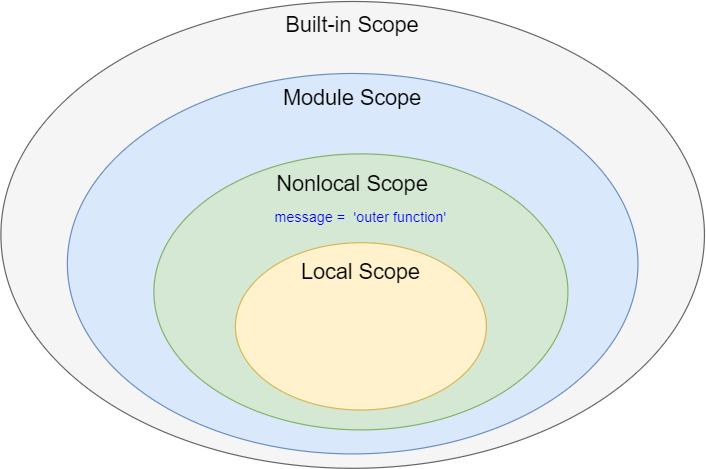

In [11]:
#See the following example:
message = 'global scope'


def outer():

    def inner():
        print(message)

    inner()


outer()

global scope


* In this example, Python searches for the message variable in the local scope of the inner function.

* Since Python doesn’t find the variable, it searches for the variable in its enclosing scope, which is the scope of the outer function.

* And in this case, Python goes up to the global scope to find the variable:
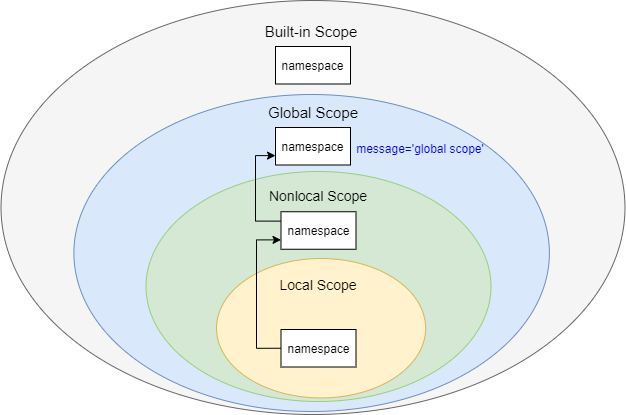

### **Python nonlocal keyword**
* To modify variables from a nonlocal scope in a local scope, you use the nonlocal keyword. For example:


In [12]:
def outer():
    message = 'outer scope'
    print(message)

    def inner():
        nonlocal message
        message = 'inner scope'
        print(message)

    inner()

    print(message)


outer()

outer scope
inner scope
inner scope


* In this example, we use nonlocal keyword to explicitly instruct Python that we’re modifying a nonlocal variable.

* When you use the nonlocal keyword for a variable, Python will look for the variable in the enclosing local scopes chain until it first encounters the variable name.

* More importantly, Python won’t look for the variable in the global scope.

* Consider the following example:

In [13]:
message = 'outer scope'


def outer():
    print(message)

    def inner():
        nonlocal message
        message = 'inner scope'
        print(message)

    inner()

    print(message)


outer()

SyntaxError: no binding for nonlocal 'message' found (3664500948.py, line 8)

* If you run this code, you’ll get the following error:


* From inside of the inner function, we use the nonlocal keyword for the message variable.

* Therefore, Python searches for the message variable in the enclosing scope, which is the scope of the outer function.

* Since the scope of the outer function doesn’t have message variable and Python doesn’t look further in the global scope, it issues an error:
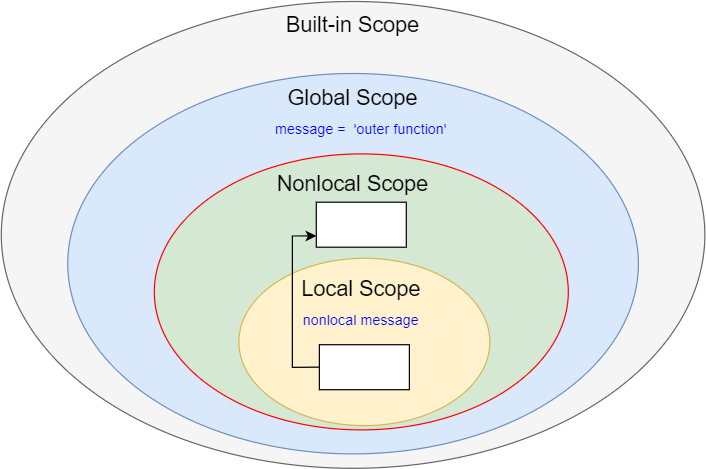
